# Classify Filament Dynamics using quantitative metrics

In [1]:
import sys
if 'init_modules' in globals().keys():
    # second or subsequent run: remove all but initially loaded modules
    for m in sys.modules.keys():
        if m not in init_modules:
            del(sys.modules[m])
else:
    # first run: find out which modules were initially loaded
    init_modules = sys.modules.keys()
    
import numpy as np
from scipy import signal
from scipy import interpolate
import matplotlib.pyplot as plt 
import seaborn as sns
from scipy import interpolate
import cmocean

import os
import pyfilaments.analysisutils as analysis
import imp
imp.reload(analysis)
%matplotlib notebook
plt.close('all')

# Figure parameters
from matplotlib import rcParams
from matplotlib import rc
from matplotlib import cm
from tqdm import tqdm

rc('font', family='sans-serif') 
rc('font', serif='Helvetica') 
rc('text', usetex='false') 
rcParams.update({'font.size': 12})

linux system
dict_keys(['builtins', 'sys', '_frozen_importlib', '_imp', '_warnings', '_thread', '_weakref', '_frozen_importlib_external', '_io', 'marshal', 'posix', 'zipimport', 'encodings', 'codecs', '_codecs', 'encodings.aliases', 'encodings.utf_8', '_signal', '__main__', 'encodings.latin_1', 'io', 'abc', '_weakrefset', '_bootlocale', '_locale', 'site', 'os', 'errno', 'stat', '_stat', 'posixpath', 'genericpath', 'os.path', '_collections_abc', '_sitebuiltins', 'sysconfig', '_sysconfigdata_m_linux_x86_64-linux-gnu', 'types', 'functools', '_functools', 'collections', 'operator', '_operator', 'keyword', 'heapq', '_heapq', 'itertools', 'reprlib', '_collections', 'weakref', 'collections.abc', 'importlib', 'importlib._bootstrap', 'importlib._bootstrap_external', 'warnings', 'importlib.util', 'importlib.abc', 'importlib.machinery', 'contextlib', 'mpl_toolkits', 'sphinxcontrib', 'runpy', 'pkgutil', 'ipykernel', 'ipykernel._version', 'ipykernel.connect', '__future__', 'json', 'json.decoder', '

In [2]:

# Load the data
# # Updated simulation data (no discretization errors)
# # root_folder = '/home/deepak/ActiveFilamentsSearch_backup_3/BendingStiffnessSweeps/b0_2_1_FullSweep_Final/activity_time_750'
# # root_folder = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrength_sweep/2021-10-20'
# # root_folder = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrength_sweep/2021-08-28'
# # root_folder = '/home/deepak/ActiveFilamentsSearch_backup_3/FinerResolution_BendingStiffness/2021-06-24'
# root_folder = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrength_sweep_RandomAnglesIC/2021-12-21'


# # Periodic example (same period as forcing)
# # track_folder = 'SimResults_Np_32_Shape_line_kappa_hat_4.0_k_15.0_b0_2.1_F_0_S_0_D_1.5_activityTime_750_simType_point'

# # Periodic example (period doubling)
# # track_folder = 'SimResults_Np_32_Shape_line_kappa_hat_6.0_k_22.0_b0_2.1_F_0_S_0_D_1.5_activityTime_750_simType_point'
# # track_folder = 'SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_3.8974358974358974_activityTime_750_simType_point'
# # track_folder = 'SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_3.0_activityTime_750_simType_point'
# # Periodic example (period quadrupling)
# # track_folder = 'SimResults_Np_32_Shape_line_kappa_hat_8.0_k_30.0_b0_2.1_F_0_S_0_D_1.5_activityTime_750_simType_point'

# track_folder = 'SimResults_Np_32_Shape_line at angle_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_0.5_activityTime_750_simType_point'

# # Aperiodic example
# # track_folder = 'SimResults_Np_32_Shape_line_kappa_hat_6.0_k_25.0_b0_2.1_F_0_S_0_D_1.5_activityTime_750_simType_point'

# # track_folder = 'SimResults_Np_32_Shape_line_kappa_hat_6_k_24.0_b0_2.1_F_0_S_0_D_1.5_activityTime_750_simType_point'

# file = 'SimResults_00_.hdf5'


# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrength_sweep/2021-08-20/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_0.6923076923076923_activityTime_750_simType_point/SimResults_00.hdf5'

# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ActivityStrength_sweep_RandomAnglesIC/2021-12-21/SimResults_Np_32_Shape_line at angle_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_0.5_activityTime_750_simType_point/SimResults_00_.hdf5'

# file = '/home/deepak/ActiveFilamentsSearch_backup_3/ModellingResults/2021-12-22/SimResults_Np_32_Shape_line at angle_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_0.5_activityTime_750_simType_point/SimResults_00_.hdf5'

file = '/home/deepak/ActiveFilamentsSearch_backup_3/ModellingResults/2021-12-23/SimResults_Np_32_Shape_line at angle_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_0.5_activityTime_750_simType_point/SimResults_00_.hdf5'

filament = analysis.analysisTools(file = file)

file_path = filament.analysisFolder
if(not os.path.exists(file_path)):
    os.makedirs(file_path)

3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 9.999733340444255
No:of particles : 32
No:of time points : 37501
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/ModellingResults/2021-12-23/SimResults_Np_32_Shape_line at angle_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_0.5_activityTime_750_simType_point
Data file SimResults_00_.hdf5


In [3]:
## Classifier successfully integrated into analysis utils
periodic_flag, min_period, threshold_index = filament.classify_filament_dynamics()

501
**************************************************
Is the dynamics Periodic? :True
**************************************************
The minimum period of the system is 1 times the forcing period
**************************************************


## Check for periodic vs aperiodic behavior of the filament

In [16]:
''' Method to detect Periodic vs Aperiodic behavior.
- Compare the subsequent filament shapes at constant phase.
- if the Euclidean distance between shapes goes below a certain value \epsilon
    Classify the dynamics as Periodic
- Else classify the dynamics as Aperiodic (at least over the simulation duration)

'''
# Find time points at a constant phase (stroboscopic)
# In the current activity profile, phase = 0 is start of compression, phase = pi is start of extension
phase_value = 0

# Smallest phase difference = 2*pi*delta_T/T
delta_phase = 2*np.pi*np.mean(filament.Time[1:]-filament.Time[:-1])/filament.activity_timescale

print(delta_phase)

abs_val_array = np.abs(filament.derived_data['Phase'] - phase_value)

constant_phase_mask = abs_val_array <= 0.5*delta_phase

print(constant_phase_mask)
print(len(constant_phase_mask))
print(len(filament.derived_data['Phase'][constant_phase_mask]))

time_points = np.array(range(0, filament.Nt))
constant_phase_indices = time_points[constant_phase_mask]

0.08377580409572781
[ True False False ... False False  True]
37501
501


## Detect if dynamics is Periodic/Aperiodic and if periodic find the smallest frequency 

0
75
a-b 1.229076505247029e-13
75
150
a-b -9.662774288967031e-15
150
225
a-b -9.621427775959738e-15
225
300
a-b -9.29735524748625e-15
300
375
a-b -9.65620147633965e-15
375
450
a-b -9.331801647676961e-15
450
525
a-b -9.273620046158435e-15
525
600
a-b -9.153258189069447e-15
600
675
a-b -9.408203417064888e-15
675
750
a-b -9.360335990427388e-15
750
825
a-b -9.54419800975983e-15
825
900
a-b -9.409617562761755e-15
900
975
a-b -9.495034250899806e-15
975
1050
a-b -9.707035870123943e-15
1050
1125
a-b -9.374043553566369e-15
1125
1200
a-b -9.528017719979493e-15
1200
1275
a-b -9.409819274742746e-15
1275
1350
a-b -9.383630107323166e-15
1350
1425
a-b -9.519067035173084e-15
1425
1500
a-b -9.376305947203738e-15
1500
1575
a-b -9.450889856897367e-15
1575
1650
a-b -9.526177270950988e-15
1650
1725
a-b -9.526867217643784e-15
1725
1800
a-b -9.471025143881232e-15
1800
1875
a-b -9.527322529359596e-15
1875
1950
a-b -9.392394178151168e-15
1950
2025
a-b -9.701978007444723e-15
2025
2100
a-b -9.53114249107227e-15


<IPython.core.display.Javascript object>


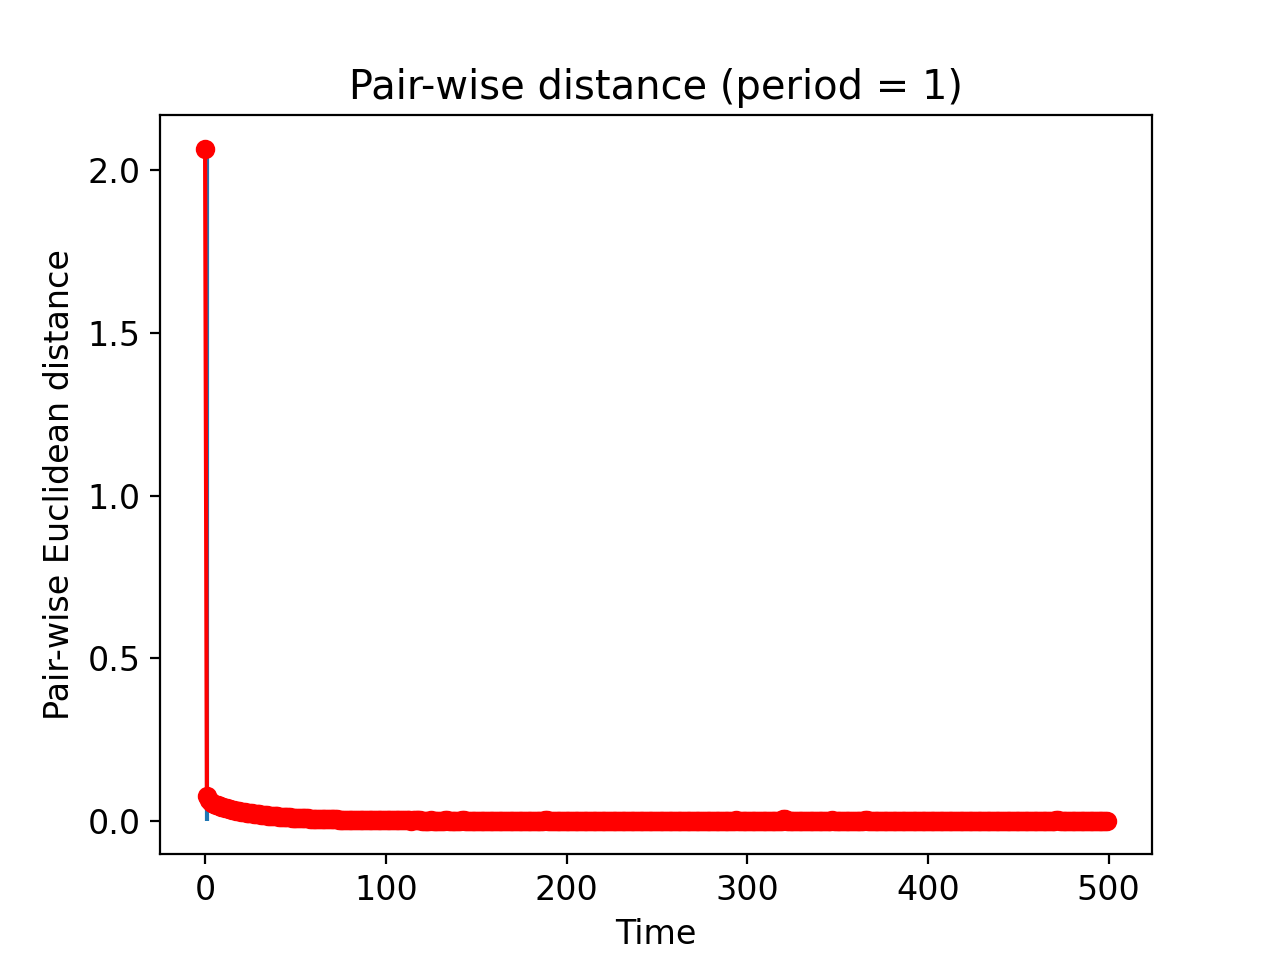

Does distance STAY below the threshold?: True
**************************************************
Is the dynamics Periodic? :True
**************************************************
The minimum period of the system is 1 times the forcing period
**************************************************


In [17]:

# Compare filament shapes at two points at constant phase 
periodic_flag = False
period_array = [1, 2, 3, 4, 5, 6, 7, 8, 16, 32] # Number of periods over which we want to compare. period = 1 means every cycle.

below_threshold_array = np.zeros(len(period_array), dtype = 'bool')
# Threshold value for comparing shapes of filaments. Currently choosen as 10% of the sphere radius. 
epsilon = 0.5*filament.radius

for period_index, period in enumerate(period_array):

#     period = 4 
    pair_wise_distance = np.zeros(len(constant_phase_indices)-period)

    for ii in range(len(constant_phase_indices)-period):

        index_a = constant_phase_indices[ii]
        index_b = constant_phase_indices[ii+period]
        
        print(index_a)
        print(index_b)


        filament_a = filament.R[index_a, :]
        filament_b = filament.R[index_b, :]
        
#         print('filament a:',filament_a[0])
#         print('filament b:', filament_b[0])
    
        print('a-b', filament_a[0]-filament_b[0])

        if(ii==500):
            plt.figure()
            first_index = 0
            second_index = 32
            r = filament_a
            plt.scatter(r[first_index:first_index+filament.Np], r[second_index:second_index+filament.Np], 20, alpha = 0.75, zorder = 20, cmap = cmocean.cm.curl)
            plt.plot(r[first_index:first_index+filament.Np], r[second_index:second_index+filament.Np], color = 'k', alpha = 0.5, zorder = 10)
            
            
            r = filament_b
            plt.scatter(r[first_index:first_index+filament.Np], r[second_index:second_index+filament.Np], 20, alpha = 0.75, zorder = 20, cmap = cmocean.cm.curl)
            plt.plot(r[first_index:first_index+filament.Np], r[second_index:second_index+filament.Np], color = 'k', alpha = 0.5, zorder = 10)
            
            plt.axis('equal')
            plt.show()

        # Calculate the pair-wise distance between the shapes of the two filaments
        distance = filament.euclidean_distance(filament_a, filament_b)
        pair_wise_distance[ii] = distance

    # Find if the distance goes below the threshold (and stays there)
#     threshold_index = next((i for i,x in enumerate(pair_wise_distance) if (pair_wise_distance[i]<=epsilon and np.all(pair_wise_distance[i:]<epsilon)) or (pair_wise_distance[i]<=epsilon and np.all(pair_wise_distance[int(len(constant_phase_indices)/2):-1]<epsilon))) , None)
    
    for i in range(len(pair_wise_distance)-1):
        
        if(pair_wise_distance[i] <=epsilon and pair_wise_distance[i+1]<=epsilon and np.all(pair_wise_distance[-10:]<=epsilon)):
            threshold_index = i
            break
        else:
            threshold_index = None
    print(threshold_index)
    
     # Plot the pairwise distance over time
    plt.figure()
    plt.plot(pair_wise_distance, 'ro-')
    if(threshold_index is not None):
        plt.vlines(x = threshold_index, ymin = min(pair_wise_distance), ymax = max(pair_wise_distance))
    plt.xlabel('Time')
    plt.ylabel('Pair-wise Euclidean distance')
    # plt.xscale('log')
    # plt.yscale('log')
    plt.title('Pair-wise distance (period = {})'.format(period))
    plt.show()
    
    if(threshold_index is not None):
        below_threshold_flag = True
        print('Does distance STAY below the threshold?: {}'.format(below_threshold_flag))
        below_threshold_array[period_index] = below_threshold_flag
        periodic_flag = True
        break
        
   
    

# Summarize the results

print(50*'*')
print('Is the dynamics Periodic? :{}'.format(periodic_flag))
min_period = next((x for i, x in enumerate(period_array) if below_threshold_array[i]==True), None)
print(50*'*')
if(min_period is not None):
    print('The minimum period of the system is {} times the forcing period'.format(min_period))
    print(50*'*')

# Filament location at constant phase

In [27]:
# Plot the location of the tip of the filament at the end of extension
# Only plot the locations for T > 250 activity cycles to ignore transients

# Find time points at a constant phase (stroboscopic)
# In the current activity profile, phase = 0 is start of compression, phase = pi is start of extension
phase_value = 0

# Smallest phase difference = 2*pi*delta_T/T
delta_phase = 2*np.pi*np.mean(filament.Time[1:]-filament.Time[:-1])/filament.activity_timescale

print(delta_phase)

abs_val_array = np.abs(filament.derived_data['Phase'] - phase_value)

constant_phase_mask = abs_val_array <= 0.5*delta_phase

print(constant_phase_mask)
print(len(constant_phase_mask))
print(len(filament.derived_data['Phase'][constant_phase_mask]))

time_points = np.array(range(0, filament.Nt))
constant_phase_indices = time_points[constant_phase_mask]



# Get a list of filament tip locations
filament_locations_x = filament.derived_data['head pos x'][constant_phase_indices[int(len(constant_phase_indices)/2):]]
filament_locations_y = filament.derived_data['head pos y'][constant_phase_indices[int(len(constant_phase_indices)/2):]]

# Get the angles that the filament tip reaches at the end of each extension
filament_angles =  np.arctan2(filament_locations_y, filament_locations_x)

print(filament_angles)

0.08377580409572781
[ True False False ... False False  True]
37501
501
[ 0.29671385 -0.29671744  0.29672498 -0.29672366  0.29671219 -0.29671753
  0.29672031 -0.29673488  0.29672821 -0.29671427  0.29671632 -0.29675567
  0.29675856 -0.29674345  0.29672142 -0.29672296  0.29673803 -0.29672481
  0.29672015 -0.29670805  0.29672012 -0.29668656  0.29668617 -0.29669788
  0.29671098 -0.29675818  0.29674634 -0.29671952  0.29670932 -0.29673848
  0.29673078 -0.29668957  0.296701   -0.29670579  0.29671709 -0.2967213
  0.29673442 -0.29672097  0.29673567 -0.29671505  0.29670032 -0.2967199
  0.29671817 -0.29671643  0.296721   -0.29671049  0.29670896 -0.29667423
  0.29670684 -0.29673397  0.29672978 -0.29670248  0.29670475 -0.29671814
  0.2967199  -0.29671653  0.29672558 -0.29671558  0.29671653 -0.2967306
  0.29673446 -0.29672323  0.29672722 -0.29669733  0.29671294 -0.29672621
  0.29672406 -0.29671501  0.29672995 -0.29668891  0.29664762 -0.29670365
  0.29673508 -0.29673119  0.2967273  -0.29674624  0.296

In [28]:
filament_angles = filament.compute_tip_angle_at_constant_phase()
print(filament_angles)

[ 0.29671385 -0.29671744  0.29672498 -0.29672366  0.29671219 -0.29671753
  0.29672031 -0.29673488  0.29672821 -0.29671427  0.29671632 -0.29675567
  0.29675856 -0.29674345  0.29672142 -0.29672296  0.29673803 -0.29672481
  0.29672015 -0.29670805  0.29672012 -0.29668656  0.29668617 -0.29669788
  0.29671098 -0.29675818  0.29674634 -0.29671952  0.29670932 -0.29673848
  0.29673078 -0.29668957  0.296701   -0.29670579  0.29671709 -0.2967213
  0.29673442 -0.29672097  0.29673567 -0.29671505  0.29670032 -0.2967199
  0.29671817 -0.29671643  0.296721   -0.29671049  0.29670896 -0.29667423
  0.29670684 -0.29673397  0.29672978 -0.29670248  0.29670475 -0.29671814
  0.2967199  -0.29671653  0.29672558 -0.29671558  0.29671653 -0.2967306
  0.29673446 -0.29672323  0.29672722 -0.29669733  0.29671294 -0.29672621
  0.29672406 -0.29671501  0.29672995 -0.29668891  0.29664762 -0.29670365
  0.29673508 -0.29673119  0.2967273  -0.29674624  0.29673187 -0.29670171
  0.29669063 -0.29671844  0.29667552 -0.29661497  0.29

<IPython.core.display.Javascript object>


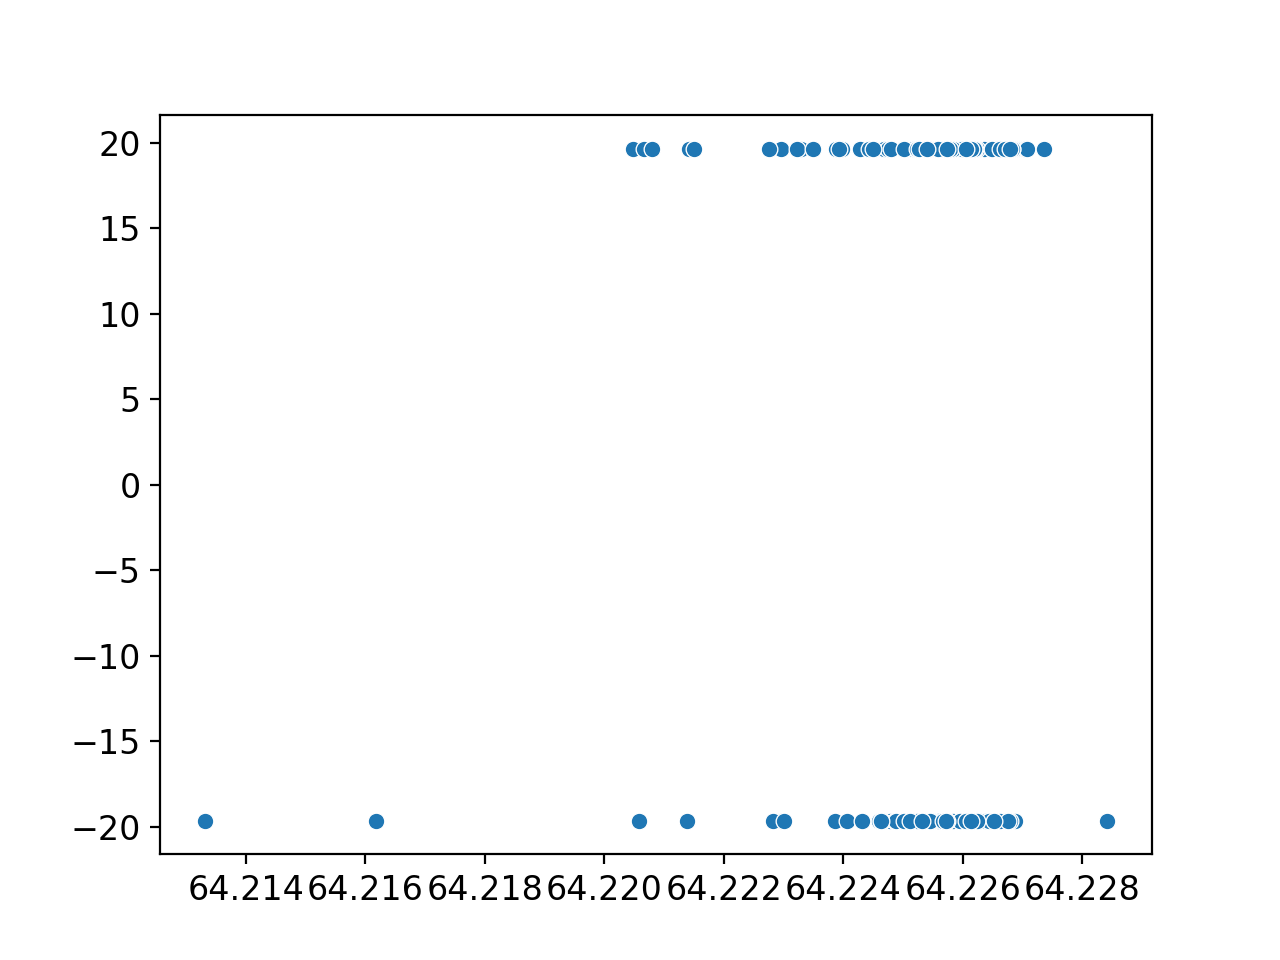

<IPython.core.display.Javascript object>


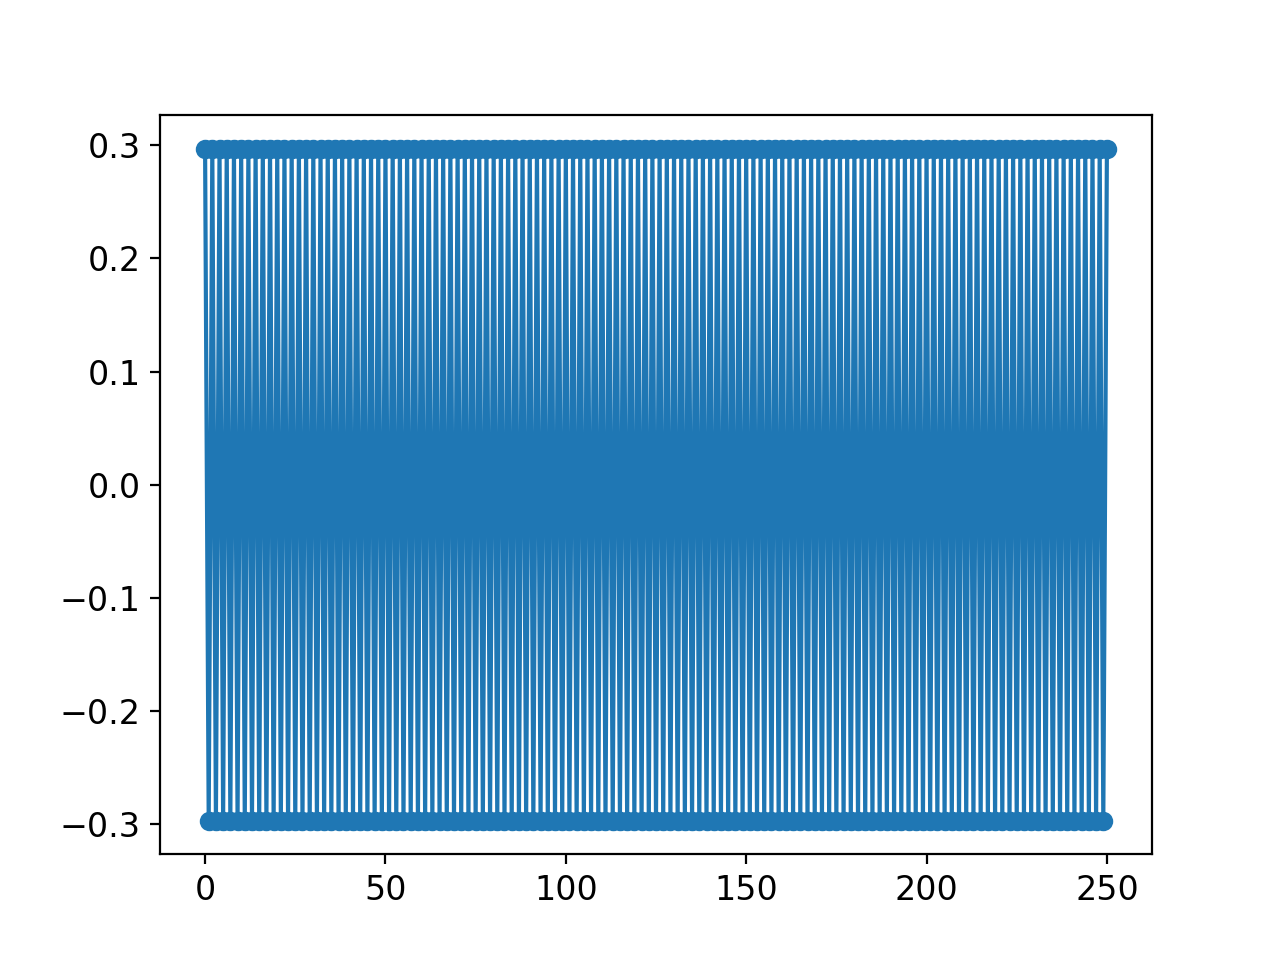

In [24]:
# Plot the filament locations at constant phase

plt.figure()
sns.scatterplot(x=filament_locations_x, y = filament_locations_y)
plt.show()

plt.figure()
plt.plot(filament_angles, marker = 'o')
plt.show()

# Frequency domain analysis of Filament time series data

In [18]:
filament.compute_base_tip_angle()
filament.compute_tip_angle()
filament.compute_arc_length()

time_series_data = filament.derived_data['tip angle']
time_series_data = time_series_data - np.mean(time_series_data)

In [19]:
### FFT of the time-series data
from scipy.fft import rfft, rfftfreq

SAMPLE_RATE = filament.Nt/(max(filament.Time))

print('Time series sample rate: {}'.format(SAMPLE_RATE))
yf = rfft(time_series_data)
xf = rfftfreq(filament.Nt, 1 / SAMPLE_RATE)



Time series sample rate: 0.10000266666666667


<IPython.core.display.Javascript object>


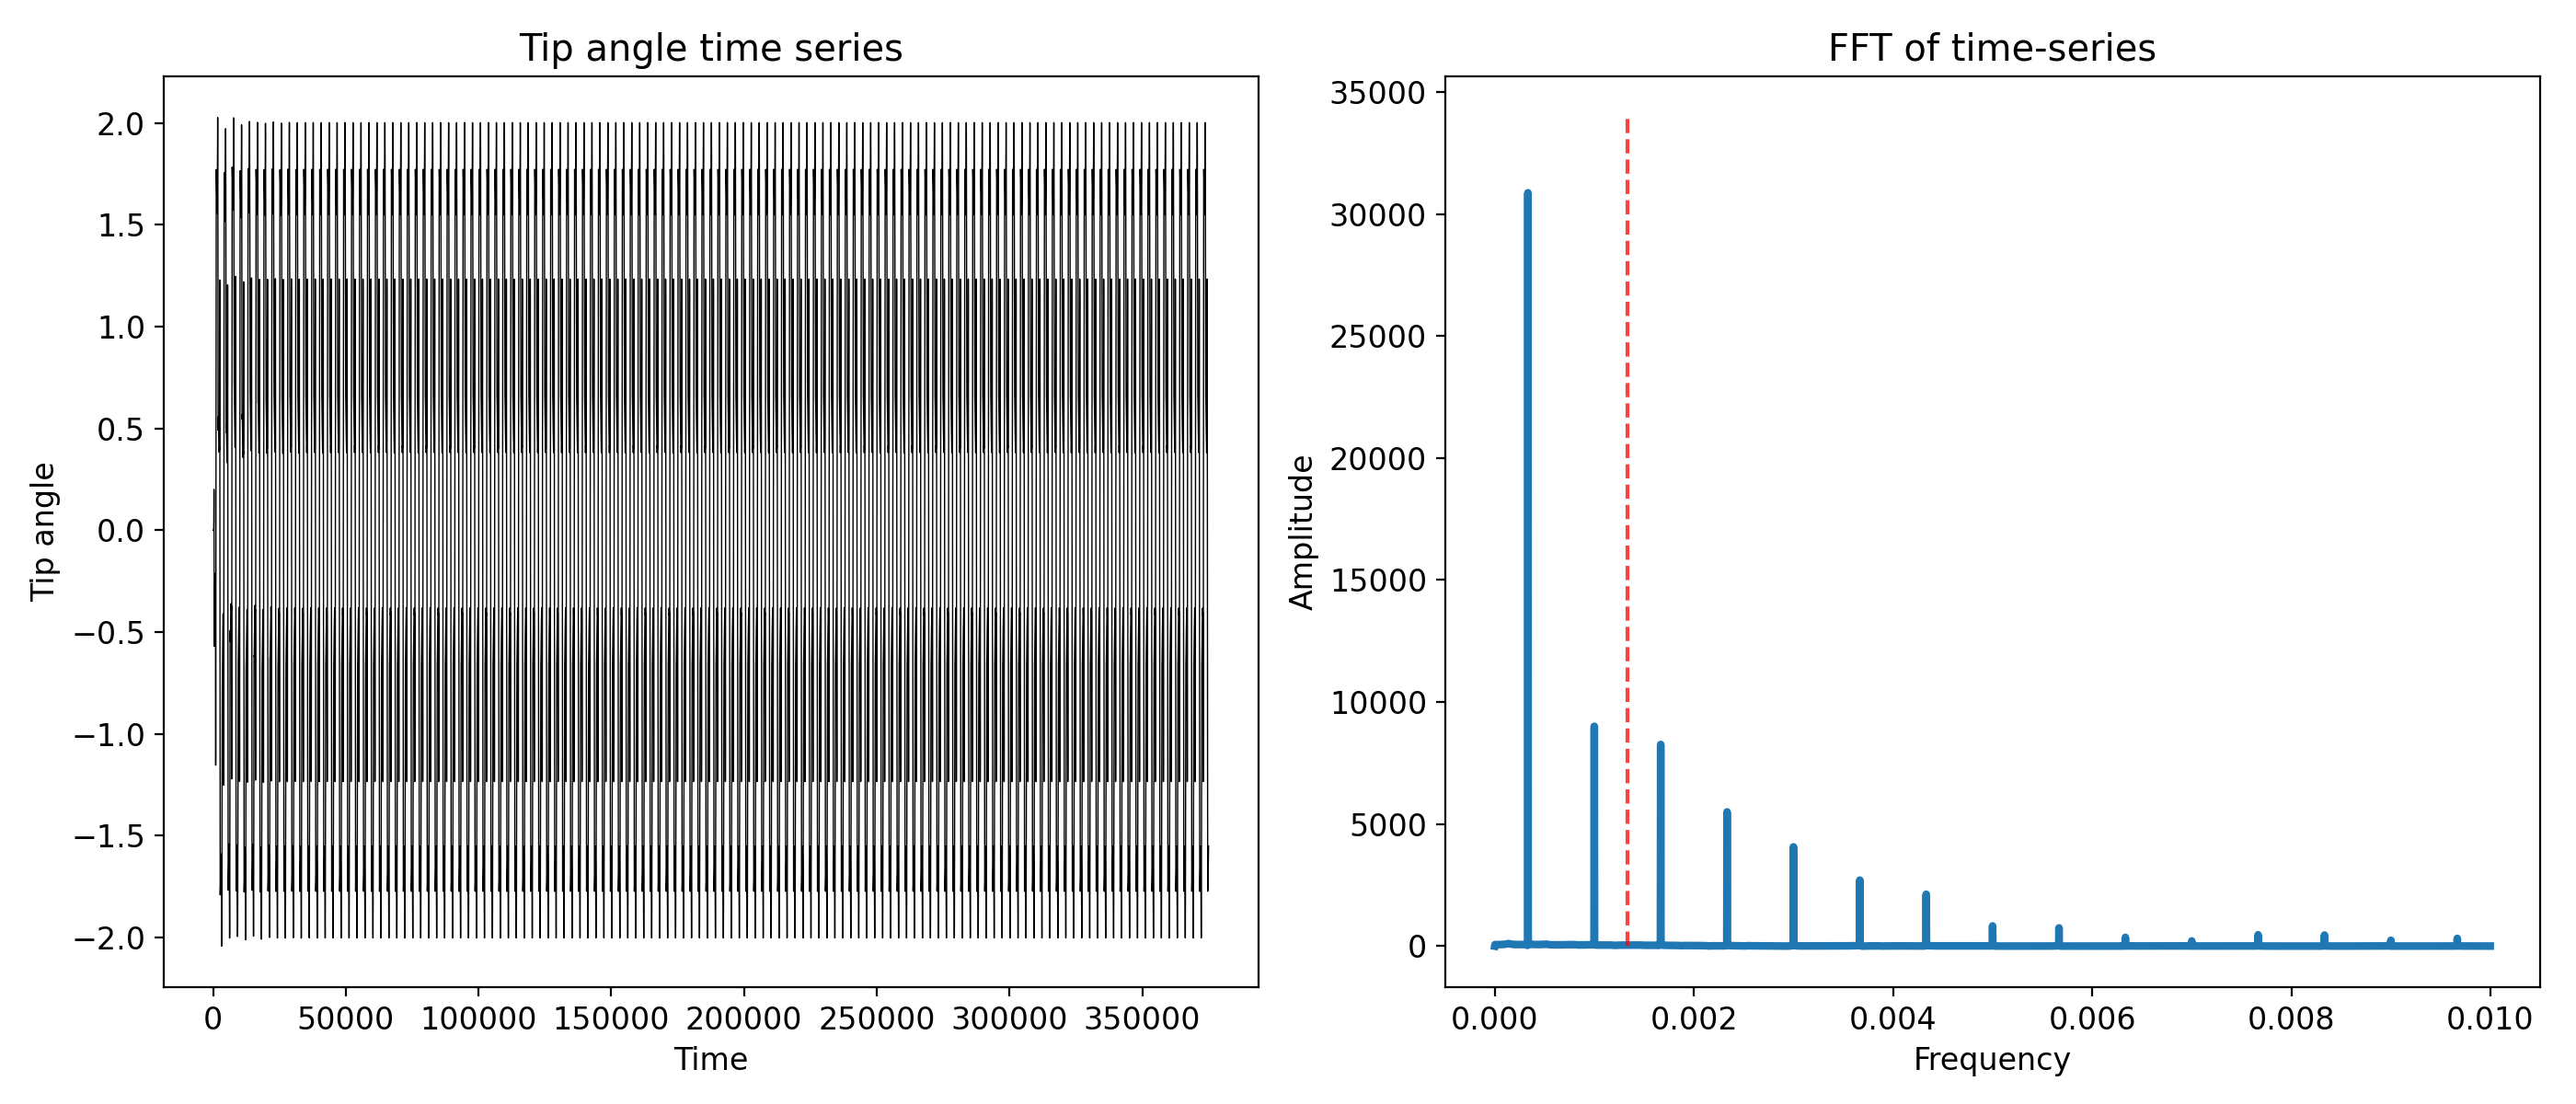

In [20]:
# Plot the FFT of the signal


clip_point = int(len(xf)/5)
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols = 2, figsize = (14, 6))

ax0.plot(filament.Time, filament.derived_data['tip angle'],color = 'k', linewidth = 0.5)
ax0.set_xlabel('Time')
ax0.set_ylabel('Tip angle')
ax0.set_title('Tip angle time series')

ax1.plot(xf[:clip_point], np.abs(yf[:clip_point]), linewidth = 3)
# Draw the forcing frequency
plt.vlines(1/filament.activity_timescale, 0, np.max(np.abs(yf[:clip_point]))+np.max(np.abs(yf[:clip_point]))/10, color = 'r', linestyle = '--',zorder=100, alpha = 0.75)
ax1.set_xlabel('Frequency')
ax1.set_ylabel('Amplitude')
ax1.set_title('FFT of time-series')
plt.tight_layout()

# Save the plot
plt.savefig(os.path.join(file_path, 'filament_time_series_fft.png'), dpi = 300)
plt.savefig(os.path.join(file_path, 'filament_time_series_fft.svg'), dpi = 300)

plt.show()

# Compare the shapes dynamics of two different filament simulations

In [28]:
root_folder = '/home/deepak/ActiveFilamentsSearch_backup_3/ModellingResults/2021-08-18'

# track_folder = 'SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.5256410256410255_activityTime_750_simType_point'
track_folder = 'SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.9102564102564101_activityTime_750_simType_point'
files = os.listdir(os.path.join(root_folder, track_folder))

files = [file for file in files if file.endswith('.hdf5')]
print(files)



['SimResults_02.hdf5', 'SimResults_00.hdf5', 'SimResults_01.hdf5']


In [29]:
# Calculate pair-wise distance between different simulation runs

filaments = {ii:analysis.analysisTools(file = os.path.join(root_folder, track_folder, file)) for ii, file in enumerate(files)}

# cehck if same number of time points saved for all filament runs
for ii in range(len(files)-1):
    assert filaments[ii].Nt==filaments[ii+1].Nt
    assert filaments[ii].Time[-1]==filaments[ii+1].Time[-1]

    
Nt = filaments[0].Nt
T = filaments[0].Time[-1]

file_path = filaments[0].analysis_folder

3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 9.999733340444255
No:of particles : 32
No:of time points : 37501
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/ModellingResults/2021-08-18/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.9102564102564101_activityTime_750_simType_point
Data file SimResults_02.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 9.999733340444255
No:of particles : 32
No:of time points : 37501
Root path:  /home/deepak/ActiveFilamentsSearch_backup_3/ModellingResults/2021-08-18/SimResults_Np_32_Shape_line_kappa_hat_6_k_25_b0_2.1_F_0_S_0_D_1.9102564102564101_activityTime_750_simType_point
Data file SimResults_00.hdf5
3
Loading Simulation data from disk .......
Loading hdf5 file
Activity profile data found!
Time step: 9.999733340444255
No:of particles : 32
No:of time points : 37501
Root path:  /home/deepak/ActiveFilamentsSearch_ba

In [32]:
pairwise_distance = np.zeros(Nt)

filament_index_1 = 0
filament_index_2 = 1

for ii in range(Nt):
    
    r1 = filaments[filament_index_1].R[ii,:]
    r2 = filaments[filament_index_2].R[ii,:]
    
    pairwise_distance[ii] = filaments[filament_index_1].euclidean_distance(r1, r2)
    
    
    
    
    
    
    
    
    

<IPython.core.display.Javascript object>


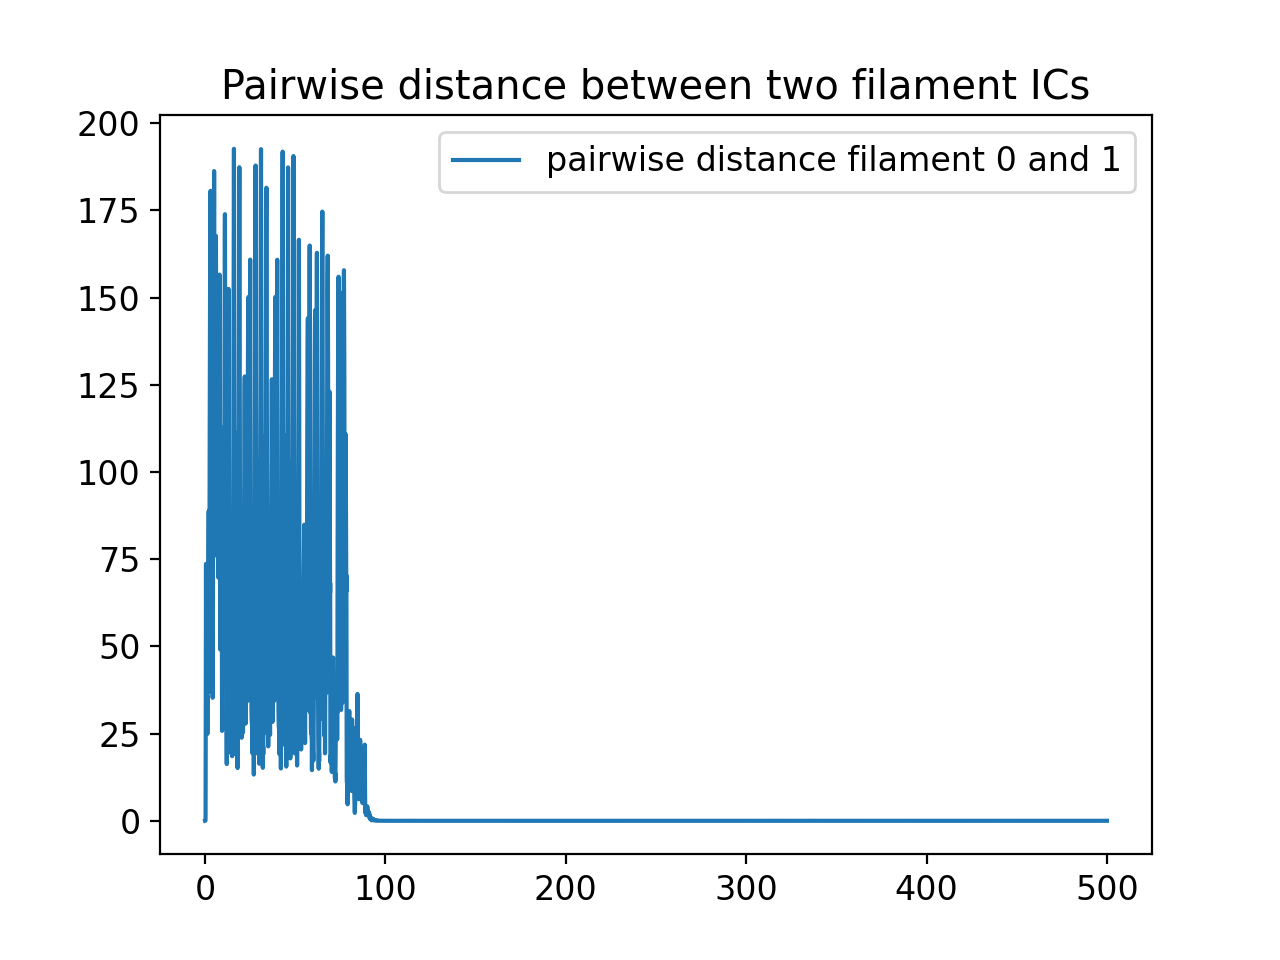

In [33]:
# Plot the pairwise distance vs Time

plt.figure()
title = 'Pairwise distance between two filament ICs'
sns.lineplot(x = filaments[0].Time/filaments[0].activity_timescale, y = pairwise_distance, label = 'pairwise distance filament {} and {}'.format(filament_index_1, filament_index_2))
plt.title(title)
plt.savefig(title+'.png', dpi = 300)
plt.show()

In [11]:
print(pairwise_distance)

[0. 0. 0. ... 0. 0. 0.]
